In [1]:
# Toolbox
# pip install <packagename> --index-url=https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host=pypi.tuna.tsinghua.edu.cn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
file_path = './mnt/data/BostonHousing.csv'
data = pd.read_csv(file_path)

In [4]:
median_value = data['medv'].median()
data['above_median'] = (data['medv'] > median_value).astype(int)


In [5]:
# Define features and target
X = data.drop(['medv', 'above_median'], axis=1)
y = data['above_median']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)


In [6]:
# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred = ada_boost.predict(X_test)


C:\Users\56111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8421052631578947
Confusion Matrix:
[[76 16]
 [ 8 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        92
           1       0.76      0.87      0.81        60

    accuracy                           0.84       152
   macro avg       0.83      0.85      0.84       152
weighted avg       0.85      0.84      0.84       152



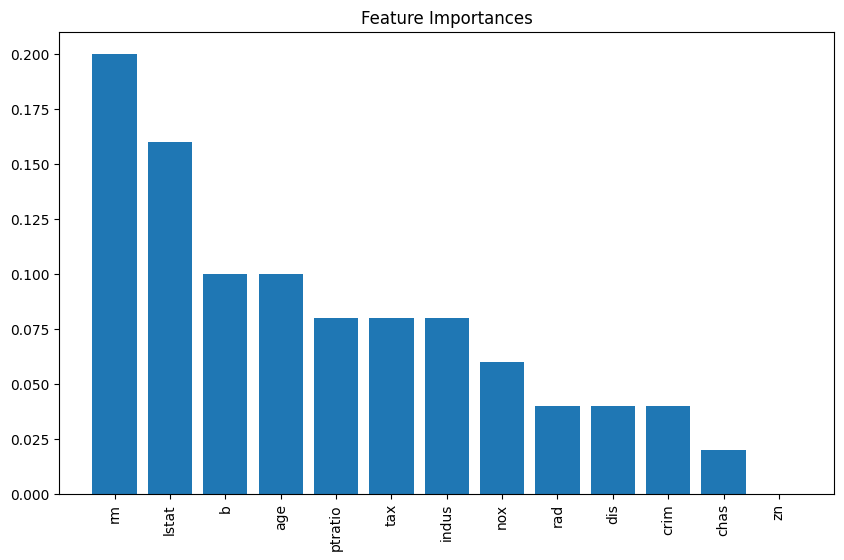

In [8]:
# Plot feature importances
importances = ada_boost.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()